In [1]:
#Notebook para desenvolvimento do projeto 1 de Machine learning
#Desenvolvido por Felipe Arruda e Leonardo Koike
#2021

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
names = ['x', 'y']
data =  pd.read_csv('cluster.dat', sep=" ", names=names)

In [4]:
data

,x,y
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


<AxesSubplot:>

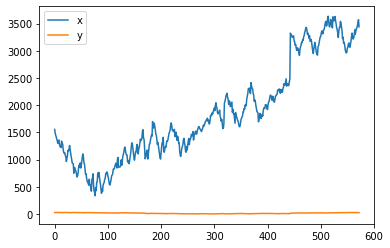

In [5]:
data.plot()

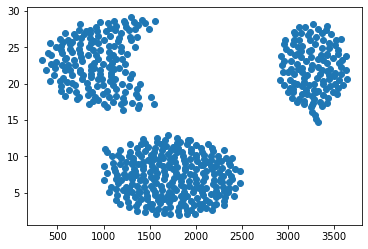

In [6]:
plt.scatter(data.x, data.y)
plt.show()